In [533]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import json
from pyzipcode import ZipCodeDatabase
import string
import colour
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold


from datetime import datetime
# from statsmodels.datasets.longley import load_pandas

# Basic functions

In [502]:
50%10
trash=np.asarray([1.,2.,3.,4.,5.])
trash2=np.asarray([10,20,30,40,50])
trash3=np.divide(trash,trash2)
year=2014
mon=4

# full_price_df=df.iloc[:,6:71]
# dates=[np.datetime64(date) for date in list(full_price_df.columns.values)]
trash=np.asarray([1,2,3,4,5])
trash[[0]]
print trash[::-1]
np.sum(np.isnan(dists))

[5 4 3 2 1]


1461

In [175]:
#load huge file
filen='../../Data/Census/CB1400CZ21.dat'
# with open(filen) as f:
#     for i in range(100):
#         print f.readline()

In [176]:
def samIsInt(string_zip):
    try:
        return int(string_zip)
    except:
        return None

In [177]:
#http://stackoverflow.com/questions/15864082/python-equivalent-of-matlabs-ismember-function
def ismember(a, b):
    bind = {}
    for i, elt in enumerate(b):
        if elt not in bind:
            bind[elt] = i
            
    return [bind.get(itm, None) for itm in a]  # None can be replaced by any other "not in b" value

In [13]:
#yelp zip codes

filename='../../Data/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'

with open(filename,'r') as yf:
    zips=[]
    bustype=[]
    for line in yf:
        current=json.loads(line)
        zips.append(samIsInt(samIsInt(current['full_address'].split(' ')[-1])))
        bustype.append([current['categories']])
#     print bustype
    zips=np.unique(np.asarray(zips))
#     print zips

## Zillow

In [178]:
#get real estate data
# http://www.zillow.com/research/data/
filename='../../Data/Zillow/Zip_MedianListingPrice_AllHomes.csv'
filename='../../Data/Zillow/Zip/Zip_MedianListingPricePerSqft_AllHomes.csv'
with open(filename,'r') as zf:
    df=pd.read_csv(zf,header=0)

    

In [440]:
def samlinearFit(df, stopdate, predictdate):
    #create linear fit for each row
    full_price_df=df.iloc[:,6:71]
    
    #determine dates
    dates=[np.datetime64(date) for date in list(full_price_df.columns.values)]
    id_pr=np.argmax(dates>predictdate)
    id_in=np.argmax(dates>stopdate)
    
    #build dataframe
    full_price_df = full_price_df.div(full_price_df.iloc[:,id_in],axis='index')
    myrange,=np.where(dates<stopdate)
    newdf=full_price_df.iloc[:,myrange]
    
    #establish variables
    flag=[]
    slin=np.empty
    NANs=np.empty([1,2])
    NANs[:]=np.NAN
    for i_, row in newdf.iterrows():
        i_df=pd.DataFrame({'price':row.values,'date':range(myrange.size)})
        if i_%2000==0:
            print i_
        try:
            result = sm.ols(formula="price ~ date", data=i_df).fit()
            if i_==0:
                slin=result.params.values
            else:
                slin=np.vstack((slin,result.params.values))
        except:
            slin=np.vstack((slin,NANs))
            flag.append(i_)
    perc= full_price_df.iloc[:,id_pr].div(full_price_df.iloc[:,id_in].values)
    return slin, flag, perc

In [441]:
#separate into pre/post 2013
#Use info from pre-2013 to train model based on 2015 real estate estimates.
featurenames=['Intercept','Slope']
features,feature_flags,output=samlinearFit(df,np.datetime64('2013-01'),np.datetime64('2015-01'))

0
2000
4000
6000
8000
10000


## Zip Codes

In [108]:
#determine zip codes within certain metropolitan areas
#determine 80/20 split
filename='../../Data/Census/City_town_all.csv'
with open(filename,'r') as zf:
    city_df=pd.read_csv(zf,header=0)


In [379]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
state_abrevs=dict((v, k) for k, v in my_map.iteritems())

In [380]:
state_abrevs['Alaska']

'AK'

In [442]:
# print city_df.dtypes

bigcity_df=city_df.where((city_df['STATE']>0) & (city_df['POPESTIMATE2010']>1e5) & (city_df['PLACE']!=0)).dropna()

cities=bigcity_df['NAME'].values
states=bigcity_df['STNAME'].values
zcdb = ZipCodeDatabase()

flags=[]

#[citynum, zipcode, latitude, logitude]
citzips=[]
for id_, cityname in enumerate(cities):
    cityname = cityname.split(' city')[0]
    statename= states[id_]
    zips= zcdb.find_zip(city=cityname,state=state_abrevs[statename])
    try:
        for z in zips:
            citzips.append([int(id_), int(z.zip), float(z.latitude), float(z.longitude)])
    except:
        flags.append(id_)
#         print cityname
#append city number to zip
#citynum, zip
citzips=np.asarray(citzips)
# print flags

In [443]:
print citzips

[[  0.00000000e+00   3.52010000e+04   3.34564120e+01  -8.68019040e+01]
 [  0.00000000e+00   3.52020000e+04   3.35446220e+01  -8.69292080e+01]
 [  0.00000000e+00   3.52030000e+04   3.35190550e+01  -8.68097000e+01]
 ..., 
 [  8.45000000e+02   5.32900000e+04   4.30372630e+01  -8.79140340e+01]
 [  8.45000000e+02   5.32930000e+04   4.30408130e+01  -8.79191350e+01]
 [  8.45000000e+02   5.32950000e+04   4.30174120e+01  -8.75696640e+01]]


In [516]:
#only use those areas where I have pricing information.

#normalize percentage increase by area.
def samNormalize(I_array):
    normval=np.nanmean(I_array)
    return np.divide(I_array,normval)

def samLatLon(I_array, weights=1):
    #determine mean
    citycenter= np.nanmean(I_array,axis=0)
    
    #determine distance from mean
    O_array=I_array
    O_array[:,0]=np.subtract(I_array[:,0],citycenter[0])
    O_array[:,1]=np.subtract(I_array[:,1],citycenter[1])
    dists=np.sqrt(np.add(np.square(O_array[:,0]),np.square(O_array[:,1])))
    return samNormalize(dists)

def samRank(I_array):
    #from High to Low
    order = I_array.argsort()[::-1]
    return order.argsort()
#rank zips by percentage

#create IO_zips
IO_zips=citzips

#remove duplicates
nzip, nind=np.unique(IO_zips[:,1],True)
IO_zips=IO_zips[nind,:]

#append data from zillow
IO_zips=np.column_stack((IO_zips,np.ones([IO_zips.shape[0],3])*np.NAN))
dfzips=df['RegionName'].values
for id_, item in enumerate(dfzips):
    index=np.where(IO_zips[:,1]==item)
    IO_zips[index,4:6]=features[id_,:]
    IO_zips[index,6]=output.values[id_]

print IO_zips.shape
#remove data not in both datasets
IO_zips=IO_zips[~np.isnan(IO_zips).any(axis=1)]

(6993, 7)


(16341, 4)
[ 1.35704051  1.10535981  0.51655152 ...,  1.17067241  0.95684189
  1.70572156]


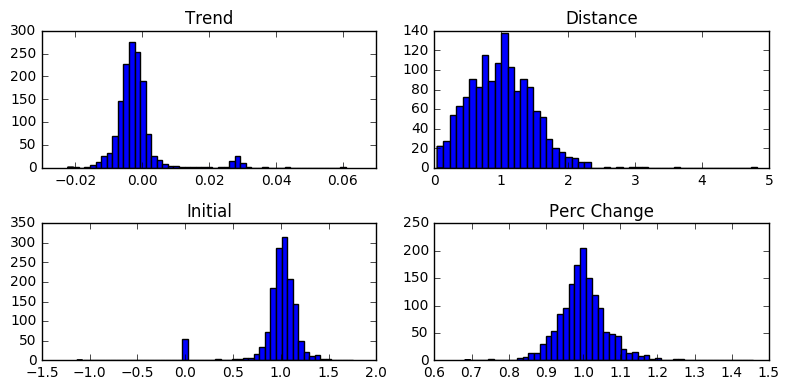

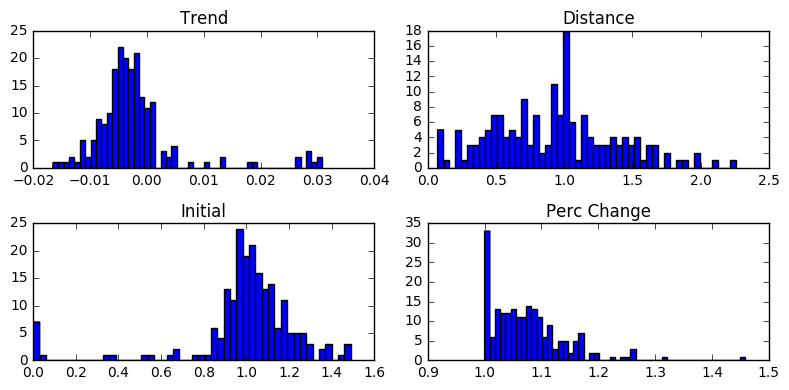

In [515]:
print citzips.shape
#rank/reference data by city
flags=np.zeros(IO_zips.shape[0])
ranks=np.ones((IO_zips.shape[0]))*np.NAN
dists=np.ones((IO_zips.shape[0]))*np.NAN
percChange=np.ones((IO_zips.shape[0]))*np.NAN
slopeInt=np.ones((IO_zips.shape[0],2))*np.NAN

for item in np.unique(IO_zips[:,0]):
    #find the median/mean value of percentage increase.
    index=np.where(IO_zips[:,0]==item)
    flags[index]=1
    
    #slopeInt
    slopeInt[index,:]=IO_zips[index,4:6]
    
    #percent change
    percChange[index]=samNormalize(IO_zips[index,6])
    #rank zips within cities
    ranks[index]=samRank(percChange[index])
    
#     print np.column_stack((ranks[index],percChange[index]))
#     print percChange[index][int(ranks[index])]
    
    #distance from center of city
    dists[index]=samLatLon(IO_zips[index,2:4][0])
    
    
#Feature space:
#1. Distance from city "center"
#2. Cost at prediction date.
#3. Trend at prediction date.

#prediction space:
#1. perc change
#2. ranked percent change
print dists
plt.close()

fig, axes=plt.subplots(ncols=2,nrows=2,figsize=[8,4])

axes[0,0].hist(slopeInt[:,1],50)
axes[0,0].set_title('Trend')

axes[1,0].hist(slopeInt[:,0],50)
axes[1,0].set_title('Initial')

axes[0,1].hist(dists[~np.isnan(dists)],50)
axes[0,1].set_title('Distance')

#[(slopeInt[:,1]>.02) & (dists<1)]
axes[1,1].hist(percChange,50)
axes[1,1].set_title('Perc Change')
plt.tight_layout()

maxn=1
fig, axes=plt.subplots(ncols=2,nrows=2,figsize=[8,4])
axes[0,0].hist(slopeInt[ranks<maxn,1],50)
axes[0,0].set_title('Trend')

axes[1,0].hist(slopeInt[ranks<maxn,0],50)
axes[1,0].set_title('Initial')
dists2=dists[ranks<maxn]
axes[0,1].hist(dists2[~np.isnan(dists2)],50)
axes[0,1].set_title('Distance')

#[(slopeInt[:,1]>.02) & (dists<1)]
axes[1,1].hist(percChange[ranks<maxn],50)
axes[1,1].set_title('Perc Change')

# axes[1].scatter(slopeInt[:,1],dists)
plt.tight_layout()
plt.show()

### Trend decreasing?



In [599]:



rank2=[]
for item in ranks:
    if item==0:
        #best
        rank2.append(0)
        continue
    if item<3:
        #good
        rank2.append(1)
        continue
    if item<6:
        #good
        rank2.append(2)
        continue
    if item<10:
        #ok
        rank2.append(3)
        continue
    #bad
    rank2.append(4)
rank2=np.asarray(rank2)

r_io=np.column_stack((slopeInt,dists,percChange,rank2))
r_io=r_io[~np.isnan(r_io).any(axis=1)]

ip=r_io[:,[1,2]]
op=r_io[:,-1]
skf = StratifiedKFold(op, n_folds=10)
for fold, (tr, te) in enumerate(skf):
    rnf = RandomForestClassifier(n_estimators=4, max_depth=None,
        min_samples_split=1, random_state=0)
    rnf.fit(ip[tr,:],op[tr])
#     print rnf.predict(r_io[0:100,0:3])
    print ('Fold:%i, Gu0:%.3f, Gu1:%.3f, Gu2:%.3f, Gu3:%.3f, Gu4:%.3f, RNF: %.3f' %
        (fold, accuracy_score(op[te], rnf.predict(ip[te,:])*0.+0.), 
         accuracy_score(op[te], rnf.predict(ip[te,:])*0.+1.), 
         accuracy_score(op[te], rnf.predict(ip[te,:])*0.+2.), 
         accuracy_score(op[te], rnf.predict(ip[te,:])*0.+3.), 
         accuracy_score(op[te], rnf.predict(ip[te,:])*0.+4.), 
         accuracy_score(op[te], rnf.predict(ip[te,:]))))


Fold:0, Gu0:0.124, Gu1:0.234, Gu2:0.234, Gu3:0.159, Gu4:0.248, RNF: 0.228
Fold:1, Gu0:0.124, Gu1:0.234, Gu2:0.234, Gu3:0.159, Gu4:0.248, RNF: 0.214
Fold:2, Gu0:0.124, Gu1:0.234, Gu2:0.234, Gu3:0.159, Gu4:0.248, RNF: 0.262
Fold:3, Gu0:0.125, Gu1:0.229, Gu2:0.236, Gu3:0.160, Gu4:0.250, RNF: 0.194
Fold:4, Gu0:0.119, Gu1:0.231, Gu2:0.238, Gu3:0.161, Gu4:0.252, RNF: 0.231
Fold:5, Gu0:0.119, Gu1:0.231, Gu2:0.238, Gu3:0.161, Gu4:0.252, RNF: 0.252
Fold:6, Gu0:0.119, Gu1:0.231, Gu2:0.238, Gu3:0.161, Gu4:0.252, RNF: 0.287
Fold:7, Gu0:0.119, Gu1:0.231, Gu2:0.238, Gu3:0.161, Gu4:0.252, RNF: 0.175
Fold:8, Gu0:0.121, Gu1:0.234, Gu2:0.234, Gu3:0.156, Gu4:0.255, RNF: 0.362
Fold:9, Gu0:0.121, Gu1:0.236, Gu2:0.236, Gu3:0.157, Gu4:0.250, RNF: 0.250


### Steps of Algorithm.
1. Take value
1. Calculate market viability.
1. Output result. 


Use random forrest to understaand variable 

Normalize based on city.
Determine feature space.
Test various algorithms.
Random forest
Regression

Feature importance from random forest.
Standardize and regularize for linear regression.

Normalize based on cities.
Encode results.

matplotlib basemap

One hot encoder


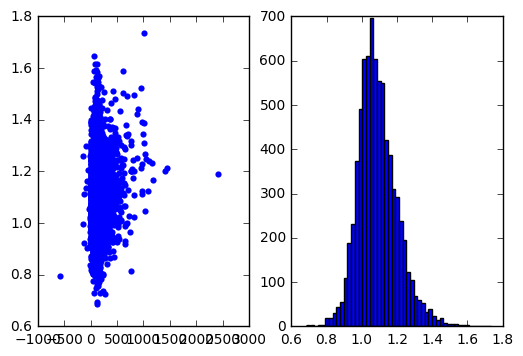

In [203]:
#group features by city, using the zc_groups.
#start making predictions based on 2013 and 2015 information.
#for now, use percentage increase as feature
#features,feature_flags,output
plt.close()
fig, axes=plt.subplots(ncols=2, nrows=1)

io=np.column_stack((features,output.values))
io=io[~np.isnan(io).any(axis=1)]

axes[0].scatter(io[:,0:1],io[:,2],lw = 0)
axes[1].hist(io[:,2],50)
plt.show()



In [ ]:
#normalize by zip code group
#assign city numbers to data.


[ 1.235091    1.23420789  1.09441835  1.0916366   0.9318767   1.17941794
  1.14503604  0.98351468  1.09618287  1.27354577  1.02210892  1.12894261
  1.15288029  1.14984754  1.20964708  1.01603634  1.03344387  1.12586374
  1.11813568  1.13170572  1.08142354  1.11728262  0.98812682  1.23597909
  0.98464013  1.00160333  1.11941633  1.13956291  0.96124482  0.97423004
  1.11728262  1.10378884  1.04850953  1.02033866  1.18425271  1.03167224
  0.98507133  1.04314916  1.01829255  1.12377967  1.09279797  1.20564197
  1.08125268  1.06774067  1.1255194   1.04790902  1.09830927  1.00510766
  1.04101298  1.02758786  1.18634559  1.17054709  1.11043804  1.03481864
  1.18086065  1.14593435  1.08567769  1.16642626  1.16849577  1.13964955
  1.09300217  1.06815554  1.26057961  1.18881774  1.10727926  1.13785074
  1.1184071   1.14127227  1.2056397   1.18618062  1.16804753  1.06558489
  1.47380089  1.15775459  0.93634023  1.03690256  1.0384412   1.08321525
  1.04865826  1.1291829   1.1179401   1.08557538  1

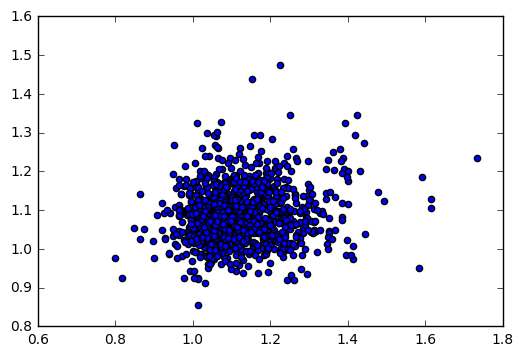

In [211]:
#random forest application
plt.close()
regressor=RandomForestRegressor(n_estimators=1500,min_samples_split=1)
n=1000
regressor.fit(io[n:,0:-2],io[n:,-1])
print regressor.predict(io[1:n,0:-2])
plt.scatter(io[0:n,-1],regressor.predict(io[0:n,0:-2]))
plt.show()

In [184]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

X = np.asarray([(1.,2.),(2.,3.),(3.,2.),(1.,3.)]) 
y = np.asarray([1,2.5,3,4])

# transform 1st column to numbers
regressor = RandomForestRegressor(n_estimators=150, min_samples_split=1)
regressor.fit(X, y)
print X
print regressor.predict(X)

[[ 1.  2.]
 [ 2.  3.]
 [ 3.  2.]
 [ 1.  3.]]
[ 1.93666667  2.93        2.56        3.35      ]


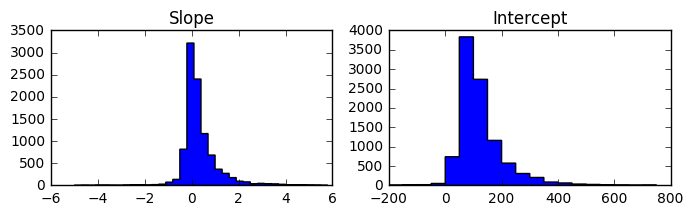

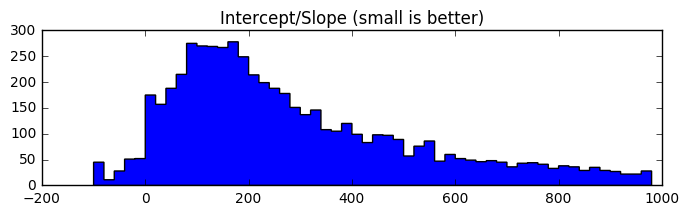

In [88]:
plt.close('all')
fig, (ax0, ax1) = plt.subplots(ncols=2,nrows=1,figsize=[8,2])

bins=np.arange(-5.,6.,.3)
ax0.hist(slopeint[:,1],bins,histtype='stepfilled')
ax0.set_title('Slope')
bins=np.arange(-200,800,50)

ax1.hist(slopeint[:,0],bins,histtype='stepfilled')
ax1.set_title('Intercept')

# Goal: Biggest change with smalles starting cost.
#starting cost/change is SMALL
fig, ax2=plt.subplots(ncols=1, nrows=1, figsize=[8,2])
goal=np.divide(slopeint[:,0],slopeint[:,1])
goal=goal[~np.isnan(goal)]

bins=np.arange(-100,1000,20)
ax2.hist(goal,bins,histtype='stepfilled')
ax2.set_title('Intercept/Slope (small is better)')
plt.show()

# Basic Plots

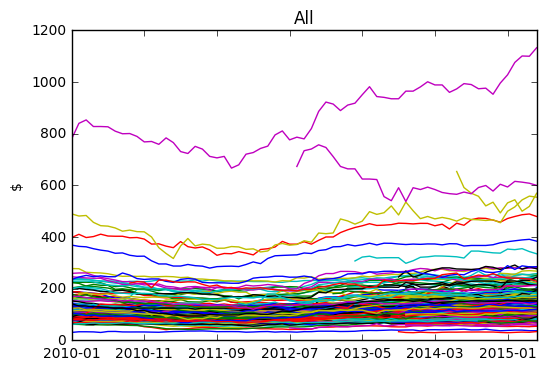

In [139]:
# print zips.tolist()
df.loc[df['RegionName'].isin(zips.tolist())].iloc[:,6:71].transpose().plot()
plt.gca().legend_.remove()
plt.title('All')
plt.ylabel('$')
plt.show()

In [140]:
#get zip data
zip1=range(85000,85099)#phoenix
zip2=range(28201,28299)#charlotte
zip3=[53705, 53711, 53744]#madison
zip4=range(15201,15295) #pittsburg
zip5=[61801, 61802, 61803] #urbana champaign
zip6=range(89101,89199)#Las Vegas

regions=['Phoenix','Charlotte','Madison','Pittsburgh','Urbana Champagin','Las Vegas']
zipregions=[zip1,zip2,zip3,zip4,zip5,zip6]

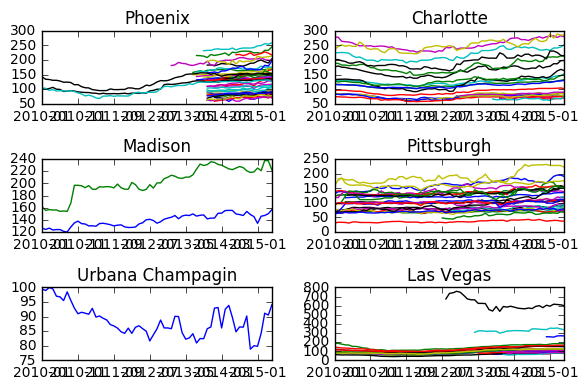

In [150]:
#query only phoenix zip codes
fig, axes=plt.subplots(nrows=3,ncols=2)
for id_, zc in enumerate(zipregions):
    a,b=divmod(id_,2)
    df.loc[df['RegionName'].isin(zc)].iloc[:,6:71].transpose().plot(ax=axes[a,b])
    
    axes[a,b].legend_.remove()
    axes[a,b].set_title(regions[id_])
fig.tight_layout()
plt.show()

# Ramblings

Within a city, there are neighborhoods which are more poised to be better real estate investments. 
Though intangible, I would place the following characteristics of importance.

- Currently cheap.
- Geographic closeness to jobs.
- Walkable neighborhoods
- Attractive to Millenials.
    + Is it already attractive to Millenials?
        * Reviews, Checkins
        * Tastes, types, hours
        * Population dynamics
    + What kind of stores are attractive to millenials/
        * Brunch
        
Census data
- Age
- Number
- Area (as small as possible)

### What is the smallest geographic area I can get population dynamics from?
1. Yearly/Monthly